In [1]:
!pip install --upgrade scikit-learn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-deep')
from sklearn.metrics import confusion_matrix
import nltk
nltk.download('stopwords')

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 9.2/9.2 MB 6.2 MB/s eta 0:00:00


C:\Users\miraj\AppData\Local\Temp\ipykernel_28388\851472779.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\miraj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

**Check out the Data**

In [4]:
df = pd.read_csv('news.csv')
df.head()

,Unnamed: 0,category,news_link,news
0,0,political,https://en.setopati.com/political/161336,"\nThe proposal of Bam Dev Gautam, who has form..."
1,1,political,https://en.setopati.com/political/161336,"\nThe proposal of Bam Dev Gautam, who has form..."
2,2,political,https://en.setopati.com/political/161351,\nThe main opposition CPN-UML has sought resig...
3,3,political,https://en.setopati.com/political/161350,\nThe Nepali Congress (NC) central committee i...
4,4,political,https://en.setopati.com/political/161344,\nThe government has extended the term of the ...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693 entries, 0 to 692
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  693 non-null    int64 
 1   category    693 non-null    object
 2   news_link   693 non-null    object
 3   news        693 non-null    object
dtypes: int64(1), object(3)
memory usage: 21.8+ KB


# **Exploratory Data Analysis**

In [6]:
df.groupby('category').count()

,Unnamed: 0,news_link,news
category,,,
International,105,105,105
blog,102,102,102
entertainment,95,95,95
political,105,105,105
social,105,105,105
sports,78,78,78
view,103,103,103


Let's make a new column to detect how long the text messages are

In [7]:
df['Length'] = df['news'].apply(len)
df.head()

,Unnamed: 0,category,news_link,news,Length
0,0,political,https://en.setopati.com/political/161336,"\nThe proposal of Bam Dev Gautam, who has form...",3129
1,1,political,https://en.setopati.com/political/161336,"\nThe proposal of Bam Dev Gautam, who has form...",3129
2,2,political,https://en.setopati.com/political/161351,\nThe main opposition CPN-UML has sought resig...,833
3,3,political,https://en.setopati.com/political/161350,\nThe Nepali Congress (NC) central committee i...,1352
4,4,political,https://en.setopati.com/political/161344,\nThe government has extended the term of the ...,539


Let's see the percentage of ham and spam in our dataset

In [9]:
df['Length'].describe()

count      693.000000
mean      4035.145743
std       3354.641773
min        350.000000
25%       1103.000000
50%       3129.000000
75%       6581.000000
max      23074.000000
Name: Length, dtype: float64

One of the text has 910 characters, let's use masking to find this message:

# **Text Cleaning**

Let’s clean the text for the messages in our dataset with NLP.

In [10]:
import string
from nltk.corpus import stopwords

In [11]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [12]:
mess = ['''For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later..''']

In [13]:
nopunc = [char for char in mess if char not in string.punctuation]
print(nopunc)

["For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."]


In [14]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\miraj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

Let's create the function to remove all punctuation, remove all stopwords and returns a list of the cleaned text

In [15]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

**Vectorization**

Now we have the messages as lists and we need to convert each of those messages into a vector that SciKit Learn's algorithm models can work with.

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(df['news'])
bow_transformer

CountVectorizer(analyzer=<function text_process at 0x00000291D7640310>)

In [18]:
bow_transformer.vocabulary_

{'proposal': 22988,
 'Bam': 1819,
 'Dev': 3144,
 'Gautam': 3958,
 'formed': 16659,
 'CPN': 2343,
 'Unity': 9170,
 'National': 6451,
 'Campaign': 2375,
 'rejoin': 23795,
 'CPNUML': 2345,
 'got': 17138,
 'stuck': 26281,
 'seems': 24864,
 'enthusiastic': 15518,
 'main': 19838,
 'opposition': 21416,
 'party': 21828,
 'removed': 23921,
 'age': 10094,
 'limit': 19551,
 '70': 958,
 'years': 28964,
 'executive': 15839,
 'committees': 12737,
 'reached': 23427,
 'UML': 9087,
 'office': 21265,
 'Chyasal': 2628,
 'met': 20236,
 'Chairman': 2473,
 'KP': 5056,
 'Sharma': 8133,
 'Oli': 6694,
 'June': 5031,
 '18': 248,
 'expressed': 15974,
 'wish': 28767,
 'claimed': 12429,
 'help': 17651,
 'expand': 15883,
 'membership': 20170,
 'six': 25386,
 'million': 20351,
 'also': 10268,
 'briefed': 11654,
 'preliminary': 22656,
 'concept': 12915,
 'achieving': 9857,
 'socialism': 25587,
 'Nepali': 6510,
 'characteristics': 12230,
 'meeting': 20151,
 'lukewarm': 19780,
 '“I': 29432,
 'gone': 17122,
 'unificatio

Print total number of vocab words

In [19]:
print(len(bow_transformer.vocabulary_))

30144


Let's take one text message and get its bag-of-words counts as a vector, putting to use our new bow_transformer

In [20]:
message4 = df['news'][3]
print(message4)


The Nepali Congress (NC) central committee is finally set to meet after a year.
NC President Sher Bahadur Deuba has called a central committee meeting starting July 12, according to an NC office-bearer.
A meeting of the party’s president, vice-president and general secretaries held at Deuba’s residence in Dhumbarahi, Kathmandu, on Wednesday agreed to call the central committee meeting.
During the meeting, the leaders also discussed other issues including the meeting of district presidents.
NC is scheduled to discuss the party’s general and active membership, meetings at different levels and other issues with district presidents at the central office in Sanepa on Thursday.
The party has already sent active membership forms to districts.
NC had last held its central committee meeting from July 11 to July 18, 2022. As per the party’s statute, the central committee should hold a meeting every two months. NC had been taking important decisions through the central working committee saying t

Now let's see its vector representation

Now let's transform the entire DataFrame of messages and create sparse matrix

In [21]:
messages_bow = bow_transformer.transform(df['news'])
messages_bow

<693x30144 sparse matrix of type '<class 'numpy.int64'>'
	with 174775 stored elements in Compressed Sparse Row format>

In [22]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (693, 30144)
Amount of Non-Zero occurences:  174775


# **TF-IDF**

Now let's compute term weighting and do normalisation with TF-IDF

In [23]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf4 = tfidf_transformer.transform(messages_bow)
print(tfidf4)

  (0, 29502)	0.045905620607885965
  (0, 29432)	0.053504016048927495
  (0, 29399)	0.045905620607885965
  (0, 29321)	0.07922836801835656
  (0, 28964)	0.03698071689051945
  (0, 28894)	0.06580088597634273
  (0, 28845)	0.0247817950439674
  (0, 28837)	0.023351056325854266
  (0, 28767)	0.03729117290556711
  (0, 28536)	0.04126904829676034
  (0, 28415)	0.04517910301589325
  (0, 28246)	0.04517910301589325
  (0, 28107)	0.04173461826318137
  (0, 27959)	0.04173461826318137
  (0, 27852)	0.1377168618236579
  (0, 27835)	0.04517910301589325
  (0, 27829)	0.13164069122867814
  (0, 27582)	0.03453476170439828
  (0, 27268)	0.024209850003852507
  (0, 27178)	0.045720616934116644
  (0, 27105)	0.08548834314923517
  (0, 27049)	0.020552720688111564
  (0, 26988)	0.028686175099344978
  (0, 26964)	0.037588793810851694
  (0, 26726)	0.06450735007472196
  :	:
  (692, 2223)	0.033464956659785855
  (692, 2221)	0.029865228928646032
  (692, 2204)	0.061253329146342905
  (692, 2092)	0.022665773466366376
  (692, 1854)	0.030812

In [24]:
# from sklearn.svm import SVC
# from datetime import datetime
# start_time = datetime.now()

# model = SVC()
# model.fit(x_train,y_train)

# end_time = datetime.now()
# process_time = round(end_time-start_time,2)
# print("Fitting SVC took {} seconds".format(process_time))

In the above evaluation, we evaluated accuracy on the same data we used for training. You should never actually evaluate on the same dataset you train on! the proper way is to split the data into a training set and test set,

**Train Test Split**

In [25]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = train_test_split(df['news'], df['category'], test_size=0.2,shuffle=True)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

554 139 693


In [26]:
label_test

363           sports
137           social
495             blog
274    entertainment
303    entertainment
           ...      
662    International
125           social
175           social
223    entertainment
13         political
Name: category, Length: 139, dtype: object

**Creating a Data Pipeline**

Let's run our model again and then predict the test set. We will create and use a pipeline for this purpose

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', SVC()),  # train on TF-IDF vectors w/ SVM
])

In [28]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x00000291D7640310>)),
                ('tfidf', TfidfTransformer()), ('classifier', SVC())])

In [29]:
set(label_test)

{'International',
 'blog',
 'entertainment',
 'political',
 'social',
 'sports',
 'view'}

In [30]:
predictions = pipeline.predict(msg_test)
predictions

array(['entertainment', 'social', 'blog', 'entertainment',
       'entertainment', 'entertainment', 'entertainment', 'International',
       'social', 'sports', 'view', 'entertainment', 'sports', 'view',
       'political', 'entertainment', 'International', 'entertainment',
       'blog', 'political', 'political', 'view', 'blog', 'political',
       'social', 'International', 'social', 'social', 'view', 'social',
       'International', 'political', 'political', 'blog', 'view',
       'International', 'political', 'view', 'entertainment', 'blog',
       'blog', 'blog', 'view', 'entertainment', 'entertainment', 'sports',
       'view', 'view', 'view', 'entertainment', 'social', 'sports',
       'political', 'International', 'International', 'entertainment',
       'blog', 'sports', 'blog', 'view', 'blog', 'International',
       'social', 'political', 'entertainment', 'entertainment', 'social',
       'view', 'International', 'sports', 'social', 'social', 'political',
       'view', 'bl

In [31]:
class_names = np.array(['International',
'blog',
'entertainment',
'political',
'social',
'sports',
'view'])

# **Making Confusion Matrix**

Confusion Matrix is going to contain the correct predictions that our model made on the set as well as the incorrect predictions.

In [32]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(label_test,predictions)
print(cm)

[[22  3  0  0  0  0  1]
 [ 0 10  0  0  0  0  3]
 [ 0  1 18  0  0  0  0]
 [ 0  0  0 19  3  0  0]
 [ 0  0  1  0 23  0  0]
 [ 0  0  3  0  0  9  0]
 [ 0  6  0  1  0  0 16]]


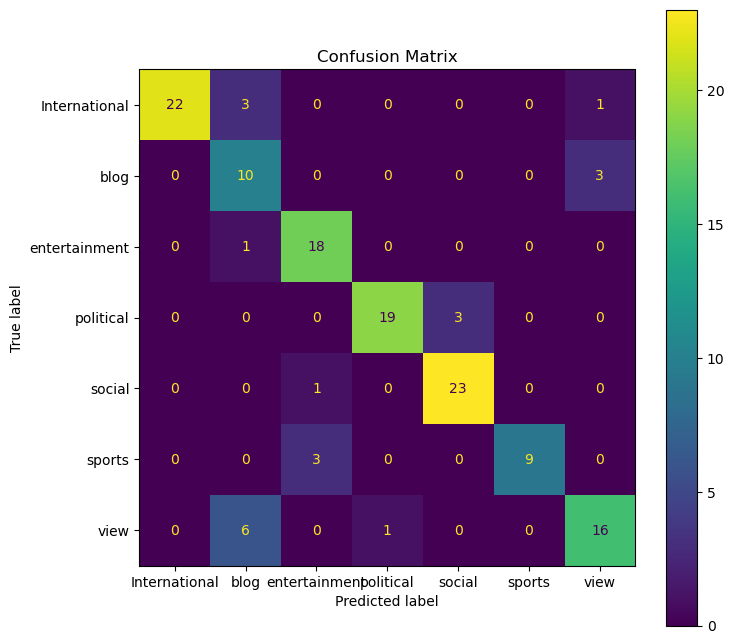

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(8,8), dpi=100)

# initialize using the raw 2D confusion matrix
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(cm, display_labels=class_names)

# set the plot title using the axes object
ax.set(title='Confusion Matrix')

# show the plot.
# Pass the parameter ax to show customizations (ex. title)
display.plot(ax=ax);

In [34]:
print(classification_report(predictions,label_test))

               precision    recall  f1-score   support

International       0.85      1.00      0.92        22
         blog       0.77      0.50      0.61        20
entertainment       0.95      0.82      0.88        22
    political       0.86      0.95      0.90        20
       social       0.96      0.88      0.92        26
       sports       0.75      1.00      0.86         9
         view       0.70      0.80      0.74        20

     accuracy                           0.84       139
    macro avg       0.83      0.85      0.83       139
 weighted avg       0.85      0.84      0.84       139



In [35]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(predictions,label_test))

Accuracy: 0.841726618705036


In [36]:
msg_test

363    \n                            The internationa...
137    \nThe Civil Aviation Authority of Nepal (CAAN)...
495    \nPatan is a historical city situated in Lalit...
274    \n                            Harvey Weinstein...
303    \n                            Gigi Hadid and Z...
                             ...                        
662    \nCritics accuse the British administration of...
125    \nFive people died and 12 others were injured ...
175    \nThe Kathmandu District Court has ordered two...
223    \n                            Jennifer Lopez s...
13     \nThe Kathmandu Metropolitan City (KMC) will f...
Name: news, Length: 139, dtype: object